# Project week 7

For the project this week, you are given a video of a ball rolling over a surface. Your job is now to detect the ball, track the position, velocity and acceleration using a Kalman filter, and finally draw the currently tracked position and predicted position of the ball in the images, while also printing the whole predicted state in either the image or the terminal.

The video "rolling_ball_result.mp4" shows what the end result could look like.

You have to make the Kalman filter yourselves, i.e. initialize the matrices and make a update and predict function. You are of course allowed to use numpy.

You can use the code below and fill in the missing parts.



QObject::moveToThread: Current thread (0x55739082d930) is not the object's thread (0x557390a71110).
Cannot move to target thread (0x55739082d930)

QObject::moveToThread: Current thread (0x55739082d930) is not the object's thread (0x557390a71110).
Cannot move to target thread (0x55739082d930)

QObject::moveToThread: Current thread (0x55739082d930) is not the object's thread (0x557390a71110).
Cannot move to target thread (0x55739082d930)

QObject::moveToThread: Current thread (0x55739082d930) is not the object's thread (0x557390a71110).
Cannot move to target thread (0x55739082d930)

QObject::moveToThread: Current thread (0x55739082d930) is not the object's thread (0x557390a71110).
Cannot move to target thread (0x55739082d930)

QObject::moveToThread: Current thread (0x55739082d930) is not the object's thread (0x557390a71110).
Cannot move to target thread (0x55739082d930)

QObject::moveToThread: Current thread (0x55739082d930) is not the object's thread (0x557390a71110).
Cannot move to tar

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'rec'. Expected sequence length 4, got 2
>  - Can't parse 'rec'. Expected sequence length 4, got 2


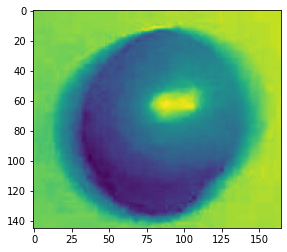

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


#def update(x, P, Z, H, R):
    ### Insert update function
    
#def predict(x, P, F, u):
    ### insert predict function
    
    
    
### Initialize Kalman filter ###
# The initial state (6x1).
x = np.zeros((6,1))

# The initial uncertainty (6x6).
P = np.identity(6)*1000

# The external motion (6x1).
u = np.zeros((6,6))

# The transition matrix (6x6). 
F = np.identity(6)

# The observation matrix (2x6).
H = np.array([[1, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0]])

# The measurement uncertainty.
R = 1

# The identity matrix. Simply a matrix with 1 in the diagonal and 0 elsewhere.
I = np.array([[1, 0],
              [0, 1]])


# Load the video
cap = cv2.VideoCapture('rolling_ball_challenge.mp4')
if not cap.isOpened():
    print("Cannot open video")
    exit()

template = cv2.imread('ball.jpg')
# Though the template is saved as a single channel (grayscale) image, it is loaded as a 3 channel image with identical channels.
# Therefore we can just take any of the three channels
template = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)
plt.imshow(template)

# Looping through all the frames
cv2.namedWindow("output", cv2.WINDOW_NORMAL) 
val = []  
HiSpeed= 100
ControlSpeedVar = 30  #Lowest: 1 - Highest:100
debugMode=1
master = None


while True:
    ret, frame0 = cap.read()
    if not ret:
        break
            
    frame1 = cv2.cvtColor(frame0,cv2.COLOR_BGR2GRAY)

    # blur frame
    frame2 = cv2.GaussianBlur(frame1,(15,15),0)

    # initialize master
    if master is None:
        master = frame2
        continue

    # delta frame
    frame3 = cv2.absdiff(master,frame2)

    # threshold frame
    frame4 = cv2.threshold(frame3,15,255,cv2.THRESH_BINARY)[1]

    # dilate the thresholded image to fill in holes
    kernel = np.ones((2,2),np.uint8)
    frame5 = cv2.erode(frame4,kernel,iterations=4)
    frame5 = cv2.dilate(frame5,kernel,iterations=8)

    # find contours on thresholded image
    contours,nada = cv2.findContours(frame5.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    # make coutour frame
    frame6 = frame0.copy()

    # target contours
    targets = []

    # loop over the contours
    for c in contours:
        
        # if the contour is too small, ignore it
        if cv2.contourArea(c) < 1500:
                continue

        # contour data
        M = cv2.moments(c)#;print( M )
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        x,y,w,h = cv2.boundingRect(c)
        rx = x+int(w/2)
        ry = y+int(h/2)
        ca = cv2.contourArea(c)

        # plot contours
        cv2.drawContours(frame6,[c],0,(0,0,255),2)
        cv2.rectangle(frame6,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.circle(frame6,(cx,cy),2,(0,0,255),2)
        cv2.circle(frame6,(rx,ry),2,(0,255,0),2)

        # save target contours
        targets.append((cx,cy,ca))

    # make target
    mx = 0
    my = 0
    if targets:

        # centroid of largest contour
        area = 0
        ar = []
        xx = []
        yy = []
        for x,y,a in targets:
            if a > area:
                mx = x
                my = y
                area = a
            if a > 4000:
                ar.append(a)
                xx.append(x)
                yy.append(y)
        

    # plot target
    val.append(area)
    # display        
    cv2.imshow('output', frame7)
    cv2.waitKey(20)

cv2.waitKey(500)
cap.release()
cv2.destroyAllWindows()
print(val)

In [49]:
cv2.waitKey(500)
cap.release()
cv2.destroyAllWindows()


Try showing the video "rolling_ball_result.mp4" instead, to see what the end result could look like.

## Hints

The first part is to detect the ball. For this part you can look back to the exercises from week 2. More specifically the end of exercise 1. You may have to adjust some parameters in order to only detect the ball.

The next part is to make the Kalman filter. If you did the exercises from monday this week, you already have a suitable update and predict function. You will have to initialize all the different matrices, which we also did in the exercises, however this time we would like the state to include position, velocity and acceleration in both the x- and y-direction (6 states).

Start by defining your state **x** and uncertainty **P**. Then define a transition matrix **F** based on your state. When defining the state transition last time we used the equation for linear motion:

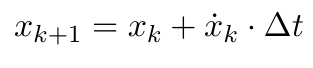

We used dt = 1 (delta t), for simplicity. You can do the same here. However, this time we also have the acceleration and therefore we use:

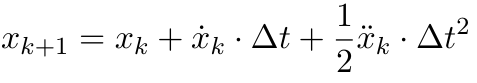

Finally, for a part of the video, the ball is behind something and can't be seen. Obviously we cant update our state here, because there is no measurement. So when there is no measurements available, you should only use the predict function and not the update function, to estimate the state.


# Challenge

If you can't get enough of tracking and Kalman filters, try extending your program, such that it can keep track of multiple balls at the same time. Use the video "rolling_ball_challenge.mp4" to test it. You can take advantage of the balls having different colours.

In [1]:
'''
    File name         : KalmanFilter.py
    Description       : KalmanFilter class used for object tracking
    Author            : Rahmad Sadli
    Date created      : 20/02/2020
    Python Version    : 3.7
'''

import numpy as np
import matplotlib.pyplot as plt

class KalmanFilter(object):
    def __init__(self, dt, u_x,u_y, std_acc, x_std_meas, y_std_meas):
        """
        :param dt: sampling time (time for 1 cycle)
        :param u_x: acceleration in x-direction
        :param u_y: acceleration in y-direction
        :param std_acc: process noise magnitude
        :param x_std_meas: standard deviation of the measurement in x-direction
        :param y_std_meas: standard deviation of the measurement in y-direction
        """

        # Define sampling time
        self.dt = dt

        # Define the  control input variables
        self.u = np.matrix([[u_x],[u_y]])

        # Intial State
        self.x = np.matrix([[0], [0], [0], [0]])

        # Define the State Transition Matrix A
        self.A = np.matrix([[1, 0, self.dt, 0],
                            [0, 1, 0, self.dt],
                            [0, 0, 1, 0],
                            [0, 0, 0, 1]])

        # Define the Control Input Matrix B
        self.B = np.matrix([[(self.dt**2)/2, 0],
                            [0,(self.dt**2)/2],
                            [self.dt,0],
                            [0,self.dt]])

        # Define Measurement Mapping Matrix
        self.H = np.matrix([[1, 0, 0, 0],
                            [0, 1, 0, 0]])

        #Initial Process Noise Covariance
        self.Q = np.matrix([[(self.dt**4)/4, 0, (self.dt**3)/2, 0],
                            [0, (self.dt**4)/4, 0, (self.dt**3)/2],
                            [(self.dt**3)/2, 0, self.dt**2, 0],
                            [0, (self.dt**3)/2, 0, self.dt**2]]) * std_acc**2

        #Initial Measurement Noise Covariance
        self.R = np.matrix([[x_std_meas**2,0],
                           [0, y_std_meas**2]])

        #Initial Covariance Matrix
        self.P = np.eye(self.A.shape[1])

    def predict(self):
        # Refer to :Eq.(9) and Eq.(10)  in https://machinelearningspace.com/object-tracking-simple-implementation-of-kalman-filter-in-python/?preview_id=1364&preview_nonce=52f6f1262e&preview=true&_thumbnail_id=1795

        # Update time state
        #x_k =Ax_(k-1) + Bu_(k-1)     Eq.(9)
        self.x = np.dot(self.A, self.x) + np.dot(self.B, self.u)

        # Calculate error covariance
        # P= A*P*A' + Q               Eq.(10)
        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q
        return self.x[0:2]

    def update(self, z):

        # Refer to :Eq.(11), Eq.(12) and Eq.(13)  in https://machinelearningspace.com/object-tracking-simple-implementation-of-kalman-filter-in-python/?preview_id=1364&preview_nonce=52f6f1262e&preview=true&_thumbnail_id=1795
        # S = H*P*H'+R
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R

        # Calculate the Kalman Gain
        # K = P * H'* inv(H*P*H'+R)
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))  #Eq.(11)

        self.x = np.round(self.x + np.dot(K, (z - np.dot(self.H, self.x))))   #Eq.(12)

        I = np.eye(self.H.shape[1])

        # Update error covariance matrix
        self.P = (I - (K * self.H)) * self.P   #Eq.(13)
        return self.x[0:2]

In [6]:
def detect(frame,debugMode):
    # Convert frame from BGR to GRAY
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if (debugMode):
        cv2.imshow('gray', gray)

    # Edge detection using Canny function
    img_edges = cv2.Canny(gray,  50, 190, 3)
    if (debugMode):
        cv2.imshow('img_edges', img_edges)

    # Convert to black and white image
    ret, img_thresh = cv2.threshold(img_edges, 254, 255,cv2.THRESH_BINARY)
    if (debugMode):
        cv2.imshow('img_thresh', img_thresh)

    # Find contours
    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Set the accepted minimum & maximum radius of a detected object
    min_radius_thresh= 15
    max_radius_thresh= 30

    centers=[]
    for c in contours:
        # ref: https://docs.opencv.org/trunk/dd/d49/tutorial_py_contour_features.html
        (x, y), radius = cv2.minEnclosingCircle(c)
        radius = int(radius)

        #Take only the valid circle(s)
        if (radius > min_radius_thresh) and (radius < max_radius_thresh):
            centers.append(np.array([[x], [y]]))
    cv2.imshow('contours', img_thresh)
    return centers

In [78]:
cv2.waitKey(500)
cap.release()
cv2.destroyAllWindows()


In [79]:
'''
    File name         : objTracking.py
    Description       : Main file for object tracking
    Author            : Rahmad Sadli
    Date created      : 20/02/2020
    Python Version    : 3.7
'''

import cv2
# Create opencv video capture object
cap = cv2.VideoCapture('rolling_ball.mp4')
if not cap.isOpened():
    print("Cannot open video")
    exit()

# Looping through all the frames
cv2.namedWindow("output", cv2.WINDOW_NORMAL) 

#Variable used to control the speed of reading the video
ControlSpeedVar = 100  #Lowest: 1 - Highest:100

HiSpeed = 100

#Create KalmanFilter object KF
#KalmanFilter(dt, u_x, u_y, std_acc, x_std_meas, y_std_meas)

KF = KalmanFilter(0.1, 1, 1, 1, 0.1,0.1)

debugMode=0
master = None

while(True):
    # Read frame
    ret, frame = cap.read()
    if not ret:
        break
    frame1 = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    # blur frame
    frame2 = cv2.GaussianBlur(frame1,(15,15),0)

    # initialize master
    if master is None:
        master = frame2
        continue

    # delta frame
    frame3 = cv2.absdiff(master,frame2)

    # threshold frame
    frame4 = cv2.threshold(frame3,15,255,cv2.THRESH_BINARY)[1]

    # dilate the thresholded image to fill in holes
    kernel = np.ones((2,2),np.uint8)
    frame5 = cv2.erode(frame4,kernel,iterations=4)
    frame5 = cv2.dilate(frame5,kernel,iterations=8)

    # find contours on thresholded image
    contours,nada = cv2.findContours(frame5.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    # make coutour frame
    frame6 = frame.copy()

    # target contours
    targets = []

    # loop over the contours
    for c in contours:
        
        # if the contour is too small, ignore it
        if cv2.contourArea(c) < 1500:
                continue

        # contour data
        M = cv2.moments(c)#;print( M )
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        x,y,w,h = cv2.boundingRect(c)
        rx = x+int(w/2)
        ry = y+int(h/2)
        ca = cv2.contourArea(c)

        # plot contours
        cv2.drawContours(frame6,[c],0,(0,0,255),2)
        cv2.rectangle(frame6,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.circle(frame6,(cx,cy),2,(0,0,255),2)
        cv2.circle(frame6,(rx,ry),2,(0,255,0),2)

        # save target contours
        targets.append((cx,cy,ca))

    # make target
    mx = 0
    my = 0
    if targets:

        # centroid of largest contour
        area = 0
        ar = []
        xx = []
        yy = []
        for x,y,a in targets:
            if a > area:
                mx = x
                my = y
                area = a
            if a > 4000:
                ar.append(a)
                xx.append(x)
                yy.append(y)
        

    # plot target
    tr = 150
    frame7 = frame.copy()
    frame7 = cv2.erode(frame7,kernel,iterations=5)
    frame7 = cv2.dilate(frame7,kernel,iterations=20)
    if targets:
        #cv2.circle(frame7,(mx,my),tr,(0,0,255,0),5)
        for i in range(len(ar)):
            cv2.circle(frame7,(xx[i],yy[i]),tr,(0,0,255,0),10)
    
    # update master
    master = frame2
    # Detect object
    centers = detect(frame,debugMode)
    centers = targets
    centers=[]
    for c in contours:
        # ref: https://docs.opencv.org/trunk/dd/d49/tutorial_py_contour_features.html
        if cv2.contourArea(c) < 1500:
                continue

        # contour data
        M = cv2.moments(c)#;print( M )
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        x,y,w,h = cv2.boundingRect(c)
        rx = x+int(w/2)
        ry = y+int(h/2)
        ca = cv2.contourArea(c)
        centers.append(np.array([[cx], [cy]]))
        
    # If centroids are detected then track them
    if (len(centers) > 0):

        # Draw the detected circle
        
        cv2.circle(frame, (int(centers[0][0]), int(centers[0][1])), 100, (0, 191, 255), 2)

        # Predict
        (x, y) = KF.predict()
        # Draw a rectangle as the predicted object position
        cv2.rectangle(frame,(int(x - 100), int(y - 100)), (int(x + 100), int(y + 100)),(0,255,0),3)

        # Update
        (x1, y1) = KF.update(centers[0])

        # Draw a rectangle as the estimated object position
        cv2.rectangle(frame, (int(x1 - 100), int(y1 - 100)), (int(x1 + 100), int(y1 + 100)), (0, 0, 255), 2)

        cv2.putText(frame, "Estimated Position", (int(x1 + 10), int(y1 + 10)), 0, 2, (0, 0, 255), 2)
        cv2.putText(frame, "Predicted Position", (int(x1 + 10), int(y)), 0, 2, (255, 0, 0), 2)
        cv2.putText(frame, "Measured Position", (int(centers[0][0] + 15), int(centers[0][1] - 15)), 0, 2, (0,191,255), 2)
    else:
        (x, y) = KF.predict()
        # Draw a rectangle as the predicted object position
        cv2.rectangle(frame,(int(x - 100), int(y - 100)), (int(x + 100), int(y + 100)),(0,255,0),3)
        cv2.putText(frame, "Predicted Position", (int(x1 + 10), int(y)), 0, 2, (255, 0, 0), 2)
        

    cv2.imshow('output', frame)
    cv2.waitKey(150)

cv2.waitKey(500)
cap.release()
cv2.destroyAllWindows()


QObject::moveToThread: Current thread (0x5599843f0360) is not the object's thread (0x559984802350).
Cannot move to target thread (0x5599843f0360)

QObject::moveToThread: Current thread (0x5599843f0360) is not the object's thread (0x559984802350).
Cannot move to target thread (0x5599843f0360)

QObject::moveToThread: Current thread (0x5599843f0360) is not the object's thread (0x559984802350).
Cannot move to target thread (0x5599843f0360)

QObject::moveToThread: Current thread (0x5599843f0360) is not the object's thread (0x559984802350).
Cannot move to target thread (0x5599843f0360)

QObject::moveToThread: Current thread (0x5599843f0360) is not the object's thread (0x559984802350).
Cannot move to target thread (0x5599843f0360)

QObject::moveToThread: Current thread (0x5599843f0360) is not the object's thread (0x559984802350).
Cannot move to target thread (0x5599843f0360)

QObject::moveToThread: Current thread (0x5599843f0360) is not the object's thread (0x559984802350).
Cannot move to tar